**Names of all group members:**


---

All code below is only suggestive and you may as well use different approaches.

## Question 1

First we create the data.

In [1]:
import numpy as np
np.random.seed(213742069)  # for reproducibility

# simulate explanatory variables x

m, n = 20000, 10000
total_samples = m + n

x1 = np.random.uniform(18, 80, total_samples)
x2 = np.random.uniform(1, 15, total_samples)
x3 = np.random.choice([0, 1], total_samples, p=[0.9, 0.1])

# Combine the simulated vectors into an array
x_total = np.column_stack((x1, x2, x3))

# a)

In [2]:
mean_x1 = np.mean(x_total[:m, 0])
std_x1 = np.std(x_total[:m, 0])

mean_x2 = np.mean(x_total[:m, 1])
std_x2 = np.std(x_total[:m, 1])

mean_x3 = np.mean(x_total[:m, 2])
std_x3 = np.std(x_total[:m, 2])

print(f'Mean and standard deviation of x1: {mean_x1:.4f}, {std_x1:.4f}')
print(f'Mean and standard deviation of x2: {mean_x2:.4f}, {std_x2:.4f}')
print(f'Mean and standard deviation of x3: {mean_x3:.4f}, {std_x3:.4f}')

Mean and standard deviation of x1: 48.9364, 17.9877
Mean and standard deviation of x2: 8.0028, 4.0340
Mean and standard deviation of x3: 0.0970, 0.2960


## b)

Credit History; Debt/Income; Geography; Size of loan requested; Gender; Race; Country of origin; Single/Maried/Divorced; Number of children; History of defaults

## Question 2

In [10]:
# Building the datasets:

ksi = np.random.uniform(0,1, total_samples)

sigmoid = lambda x: 1. / (1. + np.exp(-x))

is_x1_smaller_than25 = [1 if x1[i] <25 else 0 for i in range(total_samples)]
is_x1_bigger_than75 = [1 if x1[i] >75 else 0 for i in range(total_samples)]

p1 = [sigmoid(13.3 - 0.33*x1[i]+3.5*x2[i]-3*x3[i]) for i in range(total_samples)]
p2 = [sigmoid(5-10*(is_x1_smaller_than25[i]+is_x1_bigger_than75[i])+1.1*x2[i]-x3[i]) for i in range(total_samples)]

# build the first dataset

y1 = [1 if ksi[i] < p1[i] else 0 for i in range(total_samples)]

# build the second dataset

y2 = [1 if ksi[i] < p2[i] else 0 for i in range(total_samples)]

## a)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

x_train = x_total[:m]
y1_train = y1[:m]
y2_train = y2[:m]
x_test = x_total[m:]
y1_test = y1[m:]
y2_test = y2[m:]

# "model = LogisticRegression().fit(X_data, Y_data)" fits a model
# "pred_X = model.predict_proba(X)" evaluates the model
# (note that it outputs both P(Y=0|X) and P(Y=1|X))
# "log_loss(Y, pred_X)" evaluates the negative conditional log likelihood (also called cross-entropy loss)

# Fit the models on both datasets

model1 = LogisticRegression().fit(x_train, y1_train)
model2 = LogisticRegression().fit(x_train, y2_train)

# Calculate cross-entropy loss on both datasets for train and test

cross_entropy_loss1_train = log_loss(y1_train, model1.predict_proba(x_train))
cross_entropy_loss1_test = log_loss(y1_test, model1.predict_proba(x_test))
cross_entropy_loss2_train = log_loss(y2_train, model2.predict_proba(x_train))
cross_entropy_loss2_test = log_loss(y2_test, model2.predict_proba(x_test))

print("Cross-entropy loss for model 1 on train data:", cross_entropy_loss1_train)
print("Cross-entropy loss for model 1 on test data:", cross_entropy_loss1_test)
print("Cross-entropy loss for model 2 on train data:", cross_entropy_loss2_train)
print("Cross-entropy loss for model 2 on test data:", cross_entropy_loss2_test)


Cross-entropy loss for model 1 on train data: 0.03360427755949206
Cross-entropy loss for model 1 on test data: 0.03520373378689919
Cross-entropy loss for model 2 on train data: 0.1521220348927438
Cross-entropy loss for model 2 on test data: 0.1560300251704298


## b)

In [12]:
# Calculate normalized data

std_x1_train = np.std(x_train[:, 0])
std_x2_train = np.std(x_train[:, 1])
std_x3_train = np.std(x_train[:, 2])

normalised_x_train = x_train/[std_x1_train, std_x2_train, std_x3_train]

std_x1_test = np.std(x_test[:, 0])
std_x2_test = np.std(x_test[:, 1])
std_x3_test = np.std(x_test[:, 2])

normalised_x_test = x_test/[std_x1_test, std_x2_test, std_x3_test]

In [14]:
# Exercise 2.b) (i) and (ii)
from sklearn.svm import SVC

regularization_param = 5/(2*m)

C = 1/(2*regularization_param*m)

# "model = SVC(kernel='rbf', gamma=GAMMA, C=C, probability=True)" creates
# a model with kernel exp(-GAMMA \|x-x'\|_2^2) and regul. parameter C (note the relation between C and the parameter lambda from the lecture).
# "probability=True" enables the option "model.predict_proba(X)" to predict probabilities from the regression function \hat{f}^{svm}.
# "model.fit(X, Y)" optimizes the model parameters (using hinge loss)

# Fit the models for both datasets (this can take up to 60 seconds with SVC)

# Fit the SVM model for the first dataset
model1_svm = SVC(kernel='rbf', gamma=1/10, C=C, probability=True)
model1_svm.fit(normalised_x_train, y1_train)

# Fit the SVM model for the second dataset
model2_svm = SVC(kernel='rbf', gamma=1/10, probability=True)
model2_svm.fit(normalised_x_train, y2_train)


SVC(gamma=0.1, probability=True)

In [15]:
# Exercise 2.b (iii)
# "model.predict_proba(X)" predicts probabilities from features (note that it outputs both P(Y=0|X) and P(Y=1|X))

# Calculate cross-entropy loss on both datasets for train and test

cross_entropy_loss_svm1_train = log_loss(y1_train, model1_svm.predict_proba(normalised_x_train))
cross_entropy_loss_svm1_test = log_loss(y1_test, model1_svm.predict_proba(normalised_x_test))
cross_entropy_loss_svm2_train = log_loss(y2_train, model2_svm.predict_proba(normalised_x_train))
cross_entropy_loss_svm2_test = log_loss(y2_test, model2_svm.predict_proba(normalised_x_test))

print("Cross-entropy loss for model svm 1 on train data:", cross_entropy_loss_svm1_train)
print("Cross-entropy loss for model svm 1 on test data:", cross_entropy_loss_svm1_test)
print("Cross-entropy loss for model svm 2 on train data:", cross_entropy_loss_svm2_train)
print("Cross-entropy loss for model svm 2 on test data:", cross_entropy_loss_svm2_test)


Cross-entropy loss for model svm 1 on train data: 0.03531286910015245
Cross-entropy loss for model svm 1 on test data: 0.038316616008595435
Cross-entropy loss for model svm 2 on train data: 0.05957202838170217
Cross-entropy loss for model svm 2 on test data: 0.06804412275363803


## c)

Text(0.5, 1.0, 'SVM normalised dataset 2 FDR/TPR')

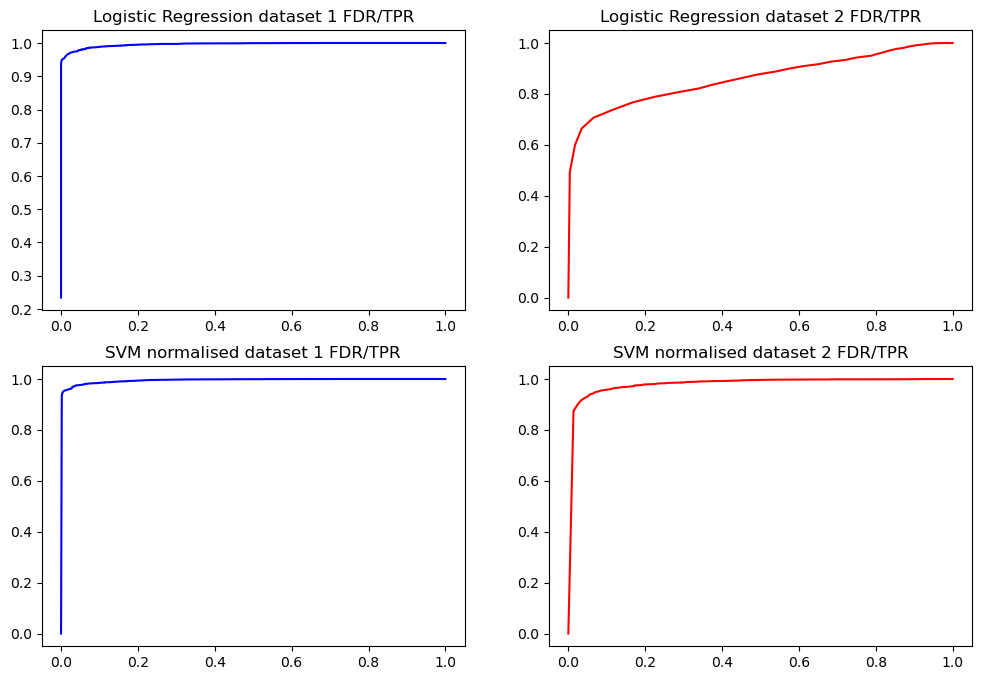

In [34]:
import matplotlib.pyplot as plt

ths = np.linspace(0, 1, 100)

def FalseDiscoveryRate(model, x_test, y_test, ths):

  y_predicted = model.predict_proba(x_test)
  y_binary_predicted = [1 if y_predicted[i][1] >= ths else 0 for i in range(len(y_predicted))]

  TN = sum([1 if y_binary_predicted[i] == y_test[i] and y_test[i]==0 else 0 for i in range(len(y_binary_predicted))])
  FP = sum([1 if y_binary_predicted[i] == 1 and y_test[i] == 0 else 0 for i in range(len(y_binary_predicted))])
  return(FP/(TN+FP))

def TruePositiveRate(model, x_test, y_test, ths):

  y_predicted = model.predict_proba(x_test)
  y_binary_predicted = [1 if y_predicted[i][1] >= ths else 0 for i in range(len(y_predicted))]

  TP = sum([1 if y_binary_predicted[i] == y_test[i] and y_test[i]==1 else 0 for i in range(len(y_binary_predicted))])
  FN = sum([1 if y_binary_predicted[i] == 0 and y_test[i] == 1 else 0 for i in range(len(y_binary_predicted))])

  return(TP/(TP+FN))

FDR_log1 = [FalseDiscoveryRate(model1, x_test, y1_test, ths[i]) for i in range(len(ths))]
TPR_log1 = [TruePositiveRate(model1, x_test, y1_test, ths[i]) for i in range(len(ths))]

FDR_log2 = [FalseDiscoveryRate(model2, x_test, y2_test, ths[i]) for i in range(len(ths))]
TPR_log2 = [TruePositiveRate(model2, x_test, y2_test, ths[i]) for i in range(len(ths))]

FDR_svm1 = [FalseDiscoveryRate(model1_svm, normalised_x_test, y1_test, ths[i]) for i in range(len(ths))]
TPR_svm1 = [TruePositiveRate(model1_svm, normalised_x_test, y1_test, ths[i]) for i in range(len(ths))]

FDR_svm2 = [FalseDiscoveryRate(model2_svm, normalised_x_test, y2_test, ths[i]) for i in range(len(ths))]
TPR_svm2 = [TruePositiveRate(model2_svm, normalised_x_test, y2_test, ths[i]) for i in range(len(ths))]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(FDR_log1, TPR_log1, color='blue')
axes[0, 0].set_title('Logistic Regression dataset 1 FDR/TPR')

axes[0, 1].plot(FDR_log2, TPR_log2, color='red')
axes[0, 1].set_title('Logistic Regression dataset 2 FDR/TPR')

axes[1, 0].plot(FDR_svm1, TPR_svm1, color='blue')
axes[1, 0].set_title('SVM normalised dataset 1 FDR/TPR')

axes[1, 1].plot(FDR_svm2, TPR_svm2, color='red')
axes[1, 1].set_title('SVM normalised dataset 2 FDR/TPR')

# To calculate the curves, it is fine to take 100 threshold values c, i.e.,

# To approximately calculate the AUC, it is fine to simply use Riemann sums.
# This means, if you have 100 (a_i, b_i) pairs for the curves, a_1 <= a_2 <= ...
# then you may simply use the sum
# sum_{i=1}^99 (b_i + b_{i+1})/2 * (a_{i+1}-a_i)
# as the approximation of the integral (or AUC)


# first data set & logistic regression:
# (the code should be reusable for all cases, only exchanging datasets and predicted probabilities depending on the model)

# Calculate positives (only depending on the dataset)

# Calculate true positives for all threshold values

# Calculate false positives for all threshold values

# Calculate FDR and TPR rate (points on the FDR/TPR curve) and the AUC


# second data set & logistic regression:


# first data set and rkhs regression:


# second data set and rkhs regression:

In [32]:
def auc(TPR, FDR):
    i=0
    auc=0
    while i < len(ths)-1:
        auc+=0.5*(TPR[i] + TPR[i+1])*abs(FDR[i+1] - FDR[i])
        i+=1
    return auc

print('Area under FDR/TPR curve for Logistic Regression on training data is:', auc(TPR_log1, FDR_log1))
print('Area under FDR/TPR curve for Logistic Regression on test data is:', auc(TPR_log2, FDR_log2))
print('Area under FDR/TPR curve for SVM on training is:', auc(TPR_svm1, FDR_svm1))
print('Area under FDR/TPR curve for SVM on test is:', auc(TPR_svm2, FDR_svm2))

Area under FDR/TPR curve for Logistic Regression on training data is: 0.9961819848179954
Area under FDR/TPR curve for Logistic Regression on test data is: 0.861440251967275
Area under FDR/TPR curve for SVM on training is: 0.9946080970691957
Area under FDR/TPR curve for SVM on test is: 0.979515668595075


In [ ]:
# Exercise 3.

# Set model parameters and define matrix D


# Scenario 1:
# Define Portfolio and possible outcomes for this portfolio using matrix D


# Plot histogram of profits and losses


# Calculate expected profit and losses and 95%-VaR


# Scenario 2:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the logistic regression model


# Plot histogram of profits and losses


# Calculate expected profit and losses and 95%-VaR


# Scenario 3:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the rkhs model


# Plot histogram of profits and losses


# Calculate expected profit and losses and 95%-VaR